In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error as mse
import pylab
pylab.rcParams['figure.figsize'] = (18, 8)
plt.style.use('ggplot')
plt.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams.update({'font.size': 18})
import utils

In [18]:
import pylab
pylab.rcParams['figure.figsize'] = (18, 8)
plt.style.use('ggplot')
plt.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams.update({'font.size': 18})

In [2]:
import pickle as pk

In [50]:
lasso = pk.load(open( "lasso_grid.p", "rb" ) )
bayes = pk.load(open( "bayes.p", "rb" ) )
ada = pk.load(open( "adaboost.p", "rb" ) )
tree = pk.load(open( "DecisionTreeRegressor.p", "rb" ) )
svr_rbf = pk.load(open( "svr_rbf_grid.p", "rb" ) )

kernel_ridge= pk.load(open( "kernel_ridge_grid.p", "rb" ) )


In [8]:
pre = utils.preprocess()
data = pd.read_csv('./train.csv')
feat = data.drop('SalePrice', 1)

In [10]:
target = np.asarray(np.log(data.SalePrice))

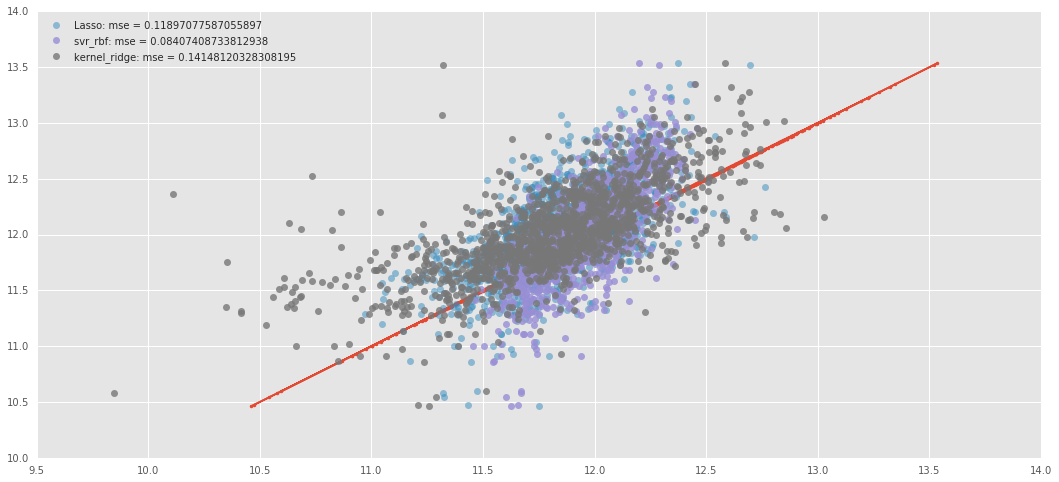

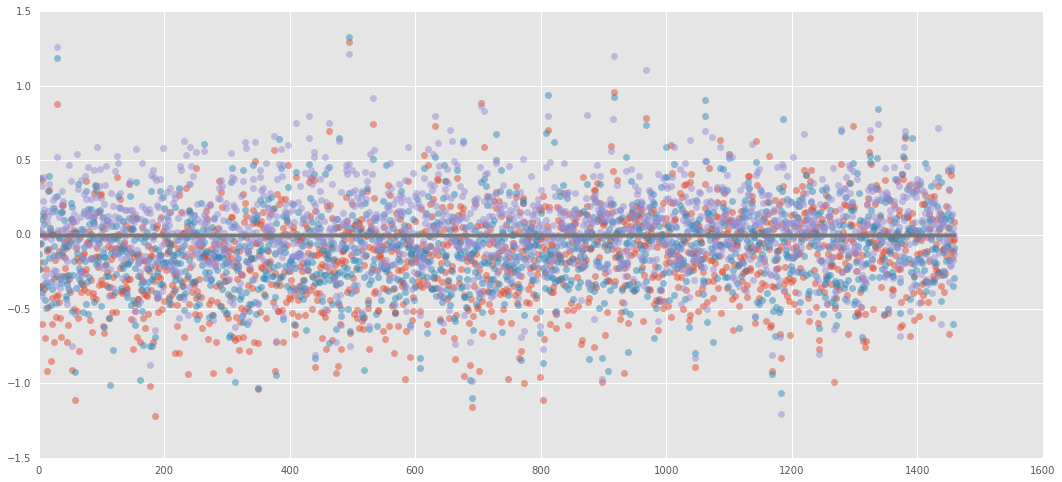

In [52]:
plt.plot(target,target,'.-')
error =(mse(lasso.best_estimator_.predict(pre.transform(feat)),target))
plt.plot(lasso.best_estimator_.predict(pre.transform(feat)),target,'o',alpha=0.5,label='Lasso: mse = {}'.format(error))

# error =(mse(ada.best_estimator_.predict(pre.transform(feat)),target))
# plt.plot(ada.best_estimator_.predict(pre.transform(feat)),target,'o',alpha=0.5,label='ada: mse = {}'.format(error))

# error =(mse(bayes.best_estimator_.predict(pre.transform(feat)),target))
# plt.plot(bayes.best_estimator_.predict(pre.transform(feat)),target,'o',alpha=0.5,label='bayes: mse = {}'.format(error))

# error =(mse(tree.best_estimator_.predict(pre.transform(feat)),target))
# plt.plot(tree.best_estimator_.predict(pre.transform(feat)),target,'o',alpha=0.5,label='bayes: tree = {}'.format(error))

error =(mse(svr_rbf.best_estimator_.predict(pre.transform(feat)),target))
plt.plot(svr_rbf.best_estimator_.predict(pre.transform(feat)),target,'o',alpha=0.8,label='svr_rbf: mse = {}'.format(error))


error =(mse(kernel_ridge.best_estimator_.predict(pre.transform(feat)),target))
plt.plot(kernel_ridge.best_estimator_.predict(pre.transform(feat)),target,'o',alpha=0.8,label='kernel_ridge: mse = {}'.format(error))




plt.legend(loc=0)
plt.figure()
plt.plot(lasso.best_estimator_.predict(pre.transform(feat))- target,'o',alpha=0.5,label='Lasso: mse = {}'.format(error))
plt.plot(ada.best_estimator_.predict(pre.transform(feat))- target,'o',alpha=0.5,label='ada: mse = {}'.format(error))
plt.plot(bayes.best_estimator_.predict(pre.transform(feat))- target,'o',alpha=0.5,label='bayes: mse = {}'.format(error))


plt.plot(np.zeros_like(target),'.')


In [53]:
predictors = pd.DataFrame()

In [34]:
predictors['lasso'] = lasso.best_estimator_.predict(pre.transform(feat))
predictors['ada'] = ada.best_estimator_.predict(pre.transform(feat))
predictors['bayes'] = bayes.best_estimator_.predict(pre.transform(feat))
predictors['tree'] = tree.best_estimator_.predict(pre.transform(feat))



In [35]:
predictors.corr()

,lasso,ada,tree,bayes
lasso,1.000000,0.476808,0.607142,0.556649
ada,0.476808,1.000000,0.488348,0.630259
tree,0.607142,0.488348,1.000000,0.386315
bayes,0.556649,0.630259,0.386315,1.000000


In [37]:
mse(lasso.best_estimator_.predict(pre.transform(feat))*0.5+ada.best_estimator_.predict(pre.transform(feat))*0.5,target)

0.080668032806002682

Write test submission

In [42]:
test = pd.read_csv("./test.csv")
preds = np.exp(lasso.best_estimator_.predict(pre.transform(test))*0.9
               +tree.best_estimator_.predict(pre.transform(test))*0.1)
solution = pd.DataFrame({"id": test.Id, "SalePrice": preds})
solution.to_csv("{}_sol.csv".format('ada+lasso'), index=False)